# HW5.  Linear Discriminant Analyis LDA


#### In this exercise, we researched Linear Discriminant Analysis as dimension reduction technique,
#### after that we ran Random Forest and Decision Tree Classifier to test the accuracry of LDA

### 1. Importing libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading data set

In [122]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv(url, names=names)  

##### Data set description
#### our data set has 4 features and one target 


In [123]:
## check the first 5 elements 
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
## check the last 5 elements 
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 3. Data set description

In [125]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### the data set has 4 numerical values which are the features and one categorical variable called class or target

#### Data visualization

c:\users\diall\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


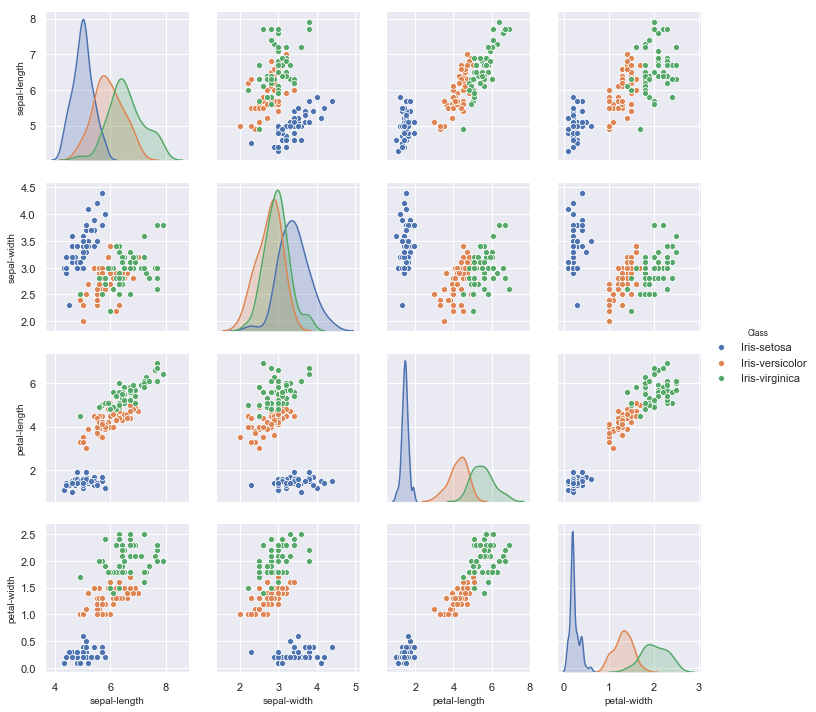

In [143]:
# This is a scatterplot for join relationship for univariate distribution

sns.pairplot(dataset, hue='Class')

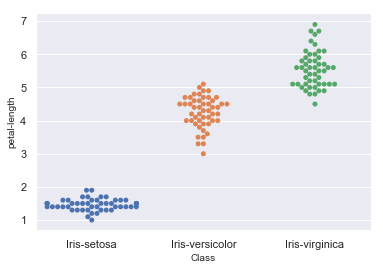

In [127]:
sns.swarmplot(x="Class", y="petal-length", data=dataset)


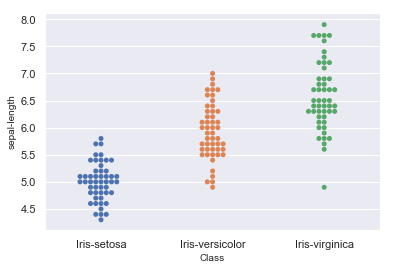

In [128]:
sns.swarmplot(x="Class", y="sepal-length", data=dataset)


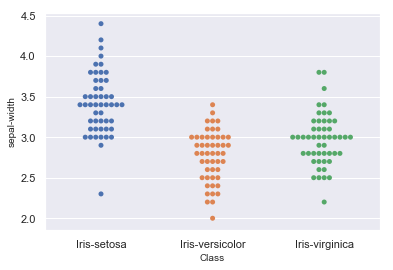

In [129]:
sns.swarmplot(x="Class", y="sepal-width", data=dataset)


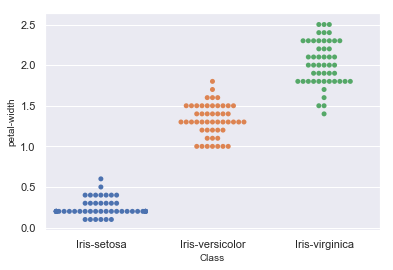

In [130]:
sns.swarmplot(x="Class", y="petal-width", data=dataset)


### 4. Data preprossesing

In [131]:
x =dataset.iloc[:,0:4].values   ## take only the first 4 features 
y =dataset.iloc[:,4].values   ## takes only the target

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### 5. Performing a Linear Discriminant Analysis

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA ## import library
lda =LDA(n_components=1)  ## we can choose the number of component whhich determine the number of linear discriminant


In [135]:
X_train = lda.fit_transform(np.array(X_train), y_train)  
X_test = lda.transform(np.array(X_test))


### 6. Training the model and making predictions Using Random Forest 

In [136]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  


c:\users\diall\appdata\local\programs\python\python37\lib\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 7. Testing the performance of the model

In [137]:
from sklearn.metrics import confusion_matrix   ## import libraries 
from sklearn.metrics import accuracy_score

In [138]:
confusion_matrix=confusion_matrix(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)

In [139]:
print('The confusion matrix is '+str(confusion_matrix))
print('The accuracy is '+str(accuracy))

The confusion matrix is [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy is 1.0


### 8. Training the model and making predictions Using Decision Tree Classifier

In [140]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

### 9. Evaluation

In [141]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 1.0


### 10.We use Decision tree against but this time we will give the criterion and max_depth

In [142]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


### References
### https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
### https://sebastianraschka.com/Articles/2014_python_lda.html

